In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from numpy.random import randn

## Figure 和 Subplot

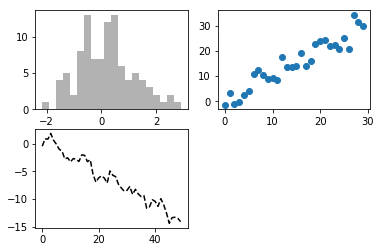

In [11]:
# 用plt.figure 创建一个新的Figure。
fig = plt.figure()
# 图像2行2列，第一个1
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# k-- 线性选项
plt.plot(randn(50).cumsum(), 'k--')
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116269400>,
      dtype=object)

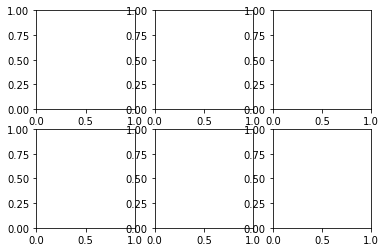

In [14]:
"""
 plt.subplots 创建一个新的Figure， 并返回创建subplot 对象的Numpy数组。
"""
fig,axes = plt.subplots(2,3)
axes

![WX20181129-132554@2x.png](https://i.loli.net/2018/11/29/5bff78721b26c.png)


## 调整subplot周围间距

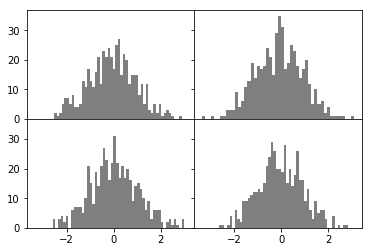

In [17]:
fig,axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)

# 设置间距为0
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色，标记，线性

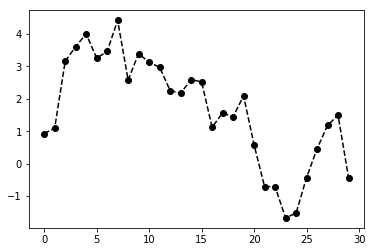

In [18]:
plt.plot(randn(30).cumsum(), 'ko--')

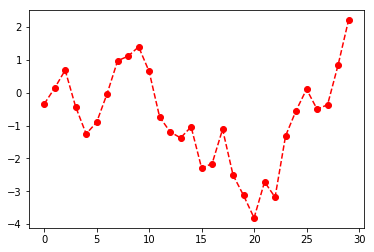

In [22]:
# 明确形式
plt.plot(randn(30).cumsum(), color='r', linestyle='dashed', marker='o')

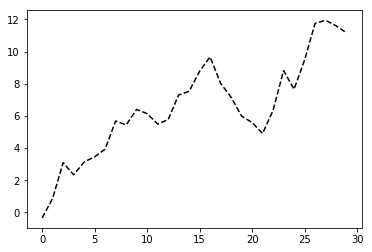

In [23]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

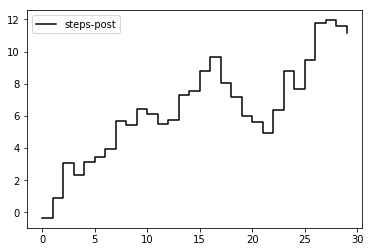

In [26]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 刻度，标签，图例

* plt.xlim()
* plt.xlim([0, 10])

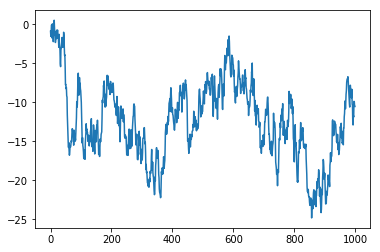

In [33]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

## 添加图例

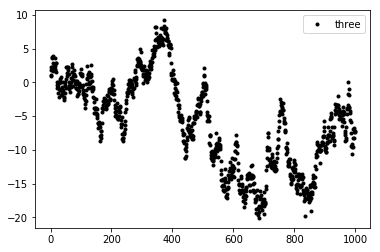

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# ax.plot(randn(1000).cumsum(), 'k', label='one')
#ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

## 注解以及在subplot上绘图

NameError: name 'x' is not defined

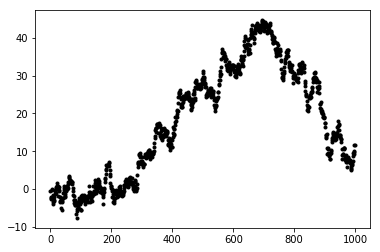

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# ax.plot(randn(1000).cumsum(), 'k', label='one')
#ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

# pandas 中的绘图函数
## 线性图

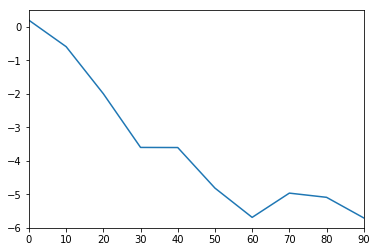

In [45]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

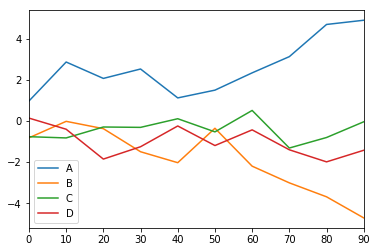

In [46]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A', 'B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

`Series.plot 方法的参数`

![WX20181129-141308@2x.png](https://i.loli.net/2018/11/29/5bff839394e49.png)
![WX20181129-141319@2x.png](https://i.loli.net/2018/11/29/5bff839377a7e.png)

`用于DataFrame 的plot的参数`
![WX20181129-141622@2x.png](https://i.loli.net/2018/11/29/5bff84494954a.png)

## 柱状图

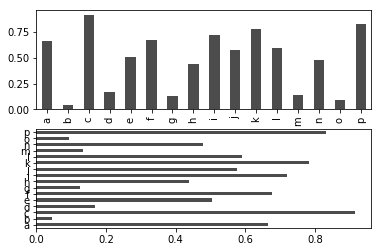

In [49]:
# kind='bar' 垂直柱状图
# kind='barh' 水平柱状图
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [52]:
# dataframe, 柱状图将会每一行的值分为一组
df = pd.DataFrame(
    np.random.rand(6,4),
    index = ['one', 'two', 'three','four', 'five', 'six'],
    columns=pd.Index(['A', 'B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.348369,0.720777,0.656297,0.474837
two,0.954753,0.339211,0.106682,0.045579
three,0.172044,0.237803,0.006472,0.294048
four,0.548939,0.209651,0.065552,0.491955
five,0.490675,0.427112,0.831198,0.044687
six,0.306785,0.292101,0.611759,0.135916


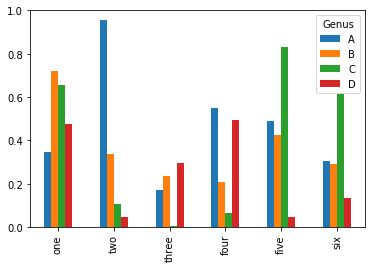

In [54]:
# dataframe 各列的名称'Genus' 用作图例的标题
df.plot(kind='bar')

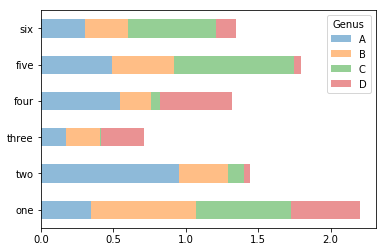

In [56]:
# 堆积柱状图
df.plot(kind='barh', stacked=True, alpha=0.5)

In [64]:
tips = pd.read_csv('./data/ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts

col_0,1708
day,
Fri,19
Sat,87
Sun,76
Thur,62


In [63]:
party_counts = party_counts.iloc[:, 2:5]
party_counts

col_0
day
Fri
Sat
Sun
Thur


## 直方图和密度图

In [57]:
# hist
# plot(kindle='kde')

## 散布图

In [66]:
macro = pd.read_csv('./data/ch08/macrodata.csv')

In [67]:
data = macro[['cpi','m1', 'tbilrate',  'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 vs.log unemp')

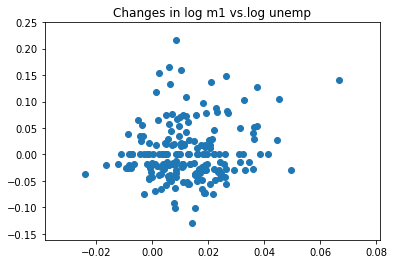

In [69]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs.log %s' % ('m1', 'unemp'))

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11685a908>,
      dtype=object)

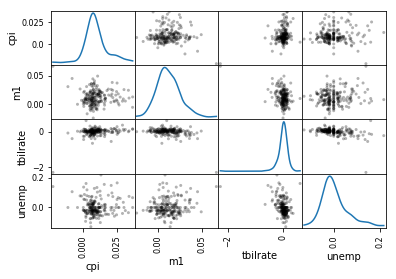

In [71]:
# 散布图
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 绘制地图：图形化显示海地地震危机数据

In [72]:
data = pd.read_csv('./data/ch08/Haiti.csv')
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [73]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [74]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [75]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [77]:
# 清除错误位置信息并移除缺失分类信息
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
           (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
           & data.CATEGORY.notnull()]

In [80]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code,names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code,names.strip()

In [81]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [82]:
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [83]:
english_mapping['6c']

'Earthquake and aftershocks'

In [84]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))), 
                          index=data.index, columns=code_index)            

In [86]:
dummy_frame.iloc[:, :6]

,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0
